---
title: Introduction Geoprocessing with GRASS GIS
description: Workshop introduction to geoprocessing with [GRASS GIS](https://grass.osgeo.org). We aim to introduce you to the basics concepts of Geographic Information Systems (GIS) and how to use GRASS GIS to perform geoprocessing tasks.
format: html
author:
    - Corey T. White
date: '2025-02-08'
keep-ipynb: true
toc: true
toc-depth: 4
image:  images/smathhacks.png
categories: [geospatial, GRASS v8.5, jupyter, workshop, SmathHack]
page-layout: full
title-block-banner: true
doi: 10.5281/zenodo.0000000
---

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OpenPlainsInc/openplainsinc.github.io/blob/main/content/workshops/smackhack25/ncssm_workshop.ipynb)[![DOI](https://zenodo.org/badge/756914869.svg)](https://zenodo.org/doi/10.5281/zenodo.10764925)

# Intro to Geoprocessing with the GRASS GIS Geoprocessing Engine

During the workshop, we aim to introduce you to the basic concepts of geospatial processing and modeling with [GRASS GIS](https://grass.osgeo.org).

## Teacher
Dr. Corey T. White is a geospatial scientist and educator with over 20 years of experience in the field of geospatial science. He is the founder of [OpenPlains](https://openplains.com), an interactive geospatial modeling platform for climate-resilience. Dr. White has a Ph.D. in Geospatial Analytics from North Carolina State University and teaches geospatial modeling and UAS mapping at the Center for Geospatial Analytics at NC State University.

## Workshop Objective

At the end of this workshop, you will be able to:

- Understand the basic concepts of GIS
- Understand the basic concepts of geoprocessing
- Understand the fundamentals of GRASS GIS
- Perform basic geoprocessing tasks with GRASS GIS
- Understand how to use GRASS GIS in a Jupyter notebook
- Develop a basic workflow for geoprocessing tasks
- Publish a basic web map with geoprocessing results


<iframe width="560" height="315" src="https://learning.openplains.com/intro-to-geoprocessing-workshop/" title="Flood Map" frameborder="0"></iframe>

## Install GRASS GIS and Data in Google Colab

Google Colab is a free cloud service that allows you to run Python code in a Jupyter notebook environment. We will use Google Colab to run GRASS GIS and perform geoprocessing tasks.

In [ ]:
%%bash

apt-get install grass grass-dev grass-doc
# leave the directory with source code
cd ~

# download sample data
mkdir -p grassdata
mkdir -p output
curl -SL https://grass.osgeo.org/sampledata/north_carolina/nc_basic_spm_grass7.zip > nc_basic_spm_grass7.zip
unzip -qq nc_basic_spm_grass7.zip
mv nc_basic_spm_grass7 grassdata
rm nc_basic_spm_grass7.zip

curl -SL https://storage.googleapis.com/public_grassdata/ncssm_workshop_data/ncssm.zip > ncssm.zip
unzip -qq ncssm.zip
mv ncssm grassdata/nc_basic_spm_grass7
rm ncssm.zip

## What is GIS?
GIS (Geographic Information System) is a system designed to capture, store, manipulate, analyze, manage, and present spatial or geographic data. GIS applications are tools that allow users to create interactive queries (user-created searches), analyze spatial information, edit data in maps, and present the results of all these operations.

### Geospatial data

Geospatial data is data that is associated with a particular location on the surface of the Earth. This data can be represented in many forms, such as **vector** data (points, lines, polygons), and **raster** data. Geospatial data can be used to answer questions such as "Where is the nearest hospital?" or "What is the likelihood of flooding at a given location?".

#### Raster Data

Raster are a way of represent `continuous` or `discrete` spatial data in a grid format. Each cell in the grid has a value that represents a particular attribute. For example, a raster could represent the temperature of the Earth's surface, with each cell representing the temperature at a particular location.

#### Vector Data

Vector data is represented as points, lines, and polygons on a map. Points are used to represent specific locations, such as the location of a tree or a building. Lines are used to represent linear features, such as roads or rivers. Polygons are used to represent areas, such as the boundaries of a city or a forest.

### Geospatial Data Collection

Geospatial data is collected in many ways, such as:

**Earth Observation Systems (Satellites, Aircraft, UAS)**

| System                  | Spatial Resolution                        | Temporal Resolution                  |
|-------------------------|-------------------------------------------|--------------------------------------|
| UAS                     | 2cm to 5cm RGB, Variable                  | Multiple times daily                 |
| PlanetScope             | 3m RGB-NIR                                | Daily                                |
| Landsat 8               | 30m multispectral, 15m panchromatic       | 16 days                              |
| Sentinel-2              | 10m visible and NIR, 20m SWIR             | 5 days at equator                    |
| MODIS (Terra and Aqua)  | 250m for some bands; 500m and 1km for others | 1 to 2 days                          |
| GOES                    | 0.5km visible, 2km infrared               | Every 30 seconds to 15 minutes       |
| Copernicus Sentinel-1   | 5 to 25m                                  | 6 to 12 days                         |
| ALOS-2                  | 3 to 10m                                  | 14 days                              |
| NOAA-20                 | 375m                                      | Daily                                |
| Himawari-8              | 0.5 to 2km                                | 10 minutes for full disk, 2.5 minutes for Japan |
| ICESat-2                | 17m along-track footprint                 | Revisits every 91 days               |

**Sensor Networks**

In-situ sensor networks are used to collect data in the environment. Common use cases incldue weather stations, flood gauges, and air quality sensors.

![USGS Stream Gauge](images/usgs_stream_gauge.jpeg){width=30%}

**Mobile Devices**

Mobile devices are used to collect data in the field. Common use cases include GPS data, photos, and field observations.

### Coordinate Reference Systems (CRS)

Coordinate reference systems (CRS) are used to specify the location of a point on the Earth's surface. 

**Geodetic (Geographic) coordinate systems** are used to specify the location of a point on the Earth's surface using latitude and longitude (units degree:minutes:seconds).

Example:

- -78.0, 35.0 (Durham, NC)

Use Case:

- GPS coordinates
- Large regions
- Data Exchange

The most common CRS is the `WGS84`, which is used by GPS systems.

**Projected coordinate systems** are used to represent the Earth's surface on a flat map.

Projected coordinate systems are a type of CRS that is used to represent the Earth's surface on a flat map. Each version uses a different mathematical model to transform the Earth's three-dimensional surface into a two-dimensional plane. The choice of a projected coordinate system depends on the region of interest and the purpose of the map.

Example Developable Surfaces:
- Cylindrical
- Conic
- azimuthal

Types of distortion:
- Conformal
- Equal Area
- Equidistant

![](images/crs_projected.jpg)

In North Carolina,`NAD83 North Carolina State Plane` (EPSG: 3358) is a commonly used projected coordinate system. It uses the `Lambert Conformal Conic` projection and has units of meters.
You can find other various of CRS at [epsg.io](https://epsg.io) that can be used for different regions of the world.


**Web Mapping & Pseudo-Mercator**

`Pseudo-Mercator` (EPSG: 3857) is a projected coordinate system that is used by web mapping services such as Google Maps, OpenStreetMap, and Bing Maps. It uses the `Mercator` projection and has units of meters.

Even though it is widely used for web mapping, it is not recommend for professional work because it has a high level of distortion at high latitudes and considers the Earth as a perfect sphere instead of an `geoid`.

You can see for yourself the distortion of the Mercator projection by using the [The true size](https://thetruesize.com) website.


**Learn More**
Learn more about [Map projection transitions](https://www.jasondavies.com/maps/transition)
Look up CRS at [epsg.io](https://epsg.io)


<iframe height="650" width="800" src="https://www.jasondavies.com/maps/transition" title="Flood Map" frameborder="0"></iframe>

## Introduction GRASS GIS

### What is a Geospatial Processing Engine?

A geospatial processing engine is a tool that allows to efficiently manipulate geospatial data through the development of scriptable geoprocesing workflows. Geoprocessing engines can be used on a local machine, distributed on the cloud, or on HPC (high performance computing) clusters (i.e., super computers).

With GRASS you can effiently process geospatial data with over 800 tools or develop your own models or tools using its C and Python APIs.

The tools are prefixed to reflect the type of data they are designe to work with.

| **Category**       | **Description**                                                                 | **Examples**                     |
|--------------------|---------------------------------------------------------------------------------|----------------------------------|
| **Display (d.\*)** | display commands for graphical screen output                                    | `d.rast`, `d.vect`               |
| **General (g.\*)** | general file management commands                                                | `g.list`, `g.copy`               |
| **Raster (r.\*)**  | raster processing commands                                                      | `r.slope.aspect`, `r.mapcalc`    |
| **Vector (v.\*)**  | vector processing commands                                                      | `v.digit`, `v.to.rast`           |
| **Imagery (i.\*)** | image processing commands                                                       | `i.atcorr`, `i.pansharpen`       |
| **Database (db.\*)** | database commands (SQLite, Postgresql, etc..)                                 | `db.select`, `db.in.ogr`         |
| **Raster 3D (r3.\*)** | 3D raster (voxel) processing commands                                        | `r3.mapcalc`, `r3.gwflow`        |
| **Temporal (t.\*)** | spatio-temporal data processing commands                                       | `t.rast.aggregate`, `t.rast.series` |
| **Miscellaneous (m.\*)** | miscellaneous commands                                                    | `m.proj`, `m.nviz.image`         |

[GRASS GIS Reference Manual](https://grass.osgeo.org/grass-stable/manuals/)

### GRASS GIS Projects and Mapsets

In GRASS a `project` resprests a group of data that is all in the same *CRS*.  Each `project` can have a collection of subprojects called *mapsets*. A `mapset` contains map *layers* in `raster` or `vector` format. Each `project` has a `PERMANENT` mapset that is used to store the original data.

[Learn More](https://grass.osgeo.org/grass-stable/manuals/grass_database.html).

#### Coordinate Reference Systems in GRASS GIS

Every `project` in GRASS GIS has a CRS. You can view the CRS of a `project` using the `g.proj` tool.

We are currently in the `nc_basic_spm_grass7` project, which uses the `NAD83 / North Carolina (meters)` coordinate reference system (EPSG:3358).

### Create a new GRASS GIS Mapset

Here we will use the GRASS GIS shell command to create a new GRASS GIS mapset. The `!` is used to run shell commands in a Jupyter notebook. The `grass` command is used to start GRASS GIS and the `-c` flag is used to create a new GRASS GIS mapset and `-e` tells the command to exit after it finishes.

In [ ]:
# ! means that we are running a command in the shell
!grass -e -c ./grassdata/nc_basic_spm_grass7/tutorial

# You can also create a new project using the Python API
# gs.create_project('nc_basic_spm_grass7', 'grassdata/nc_basic_spm_grass7/tutorial', epsg=3358)

## GRASS GIS with Python

GRASS GIS has two core libraries for working with geospatial data in Python:

- `grass.script` - Python library for working with GRASS GIS modules
- `grass.pygrass` - Python library for working with GRASS GIS data structures

We will use the `grass.script as gs` library to perform geoprocessing tasks in this workshop.

For interaction with Jupiter notebooks, we will use `grass.jupyter as gj` to display maps and other outputs.

### GRASS Python Environment Setup

To use GRASS GIS in Python, we need to set the `GISBASE` environment variable to the location of the GRASS GIS installation. We also need to add the GRASS GIS Python library to the Python path.

In [40]:
import os
import subprocess
import sys
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from PIL import Image 
import pandas as pd
import sqlite3
from IPython.display import IFrame
from IPython.display import display
# Switch to the home directory
# os.chdir(os.path.expanduser("~")) # Colab only

# Ask GRASS GIS where its Python packages are.
gisbase = subprocess.check_output(["grass", "--config", "path"], text=True).strip()
os.environ["GISBASE"] = gisbase

# Ask GRASS GIS where its Python packages are.
sys.path.append(
    subprocess.check_output(["grass", "--config", "python_path"], text=True).strip()
)

# Import the GRASS GIS packages we need.
import grass.script as gs

# Import GRASS Jupyter
import grass.jupyter as gj


### GRASS GIS Session

With our Python environment setup we can start a GRASS GIS session using the `gj.init` function. Here we pass the the path to our `project/mapset` (`nc_basic_spm_grass7/tutorial`). This will allow us to exectute GRASS GIS commands in Python in the `tutorial` mapset.

In [42]:
# Start a GRASS session
session = gj.init("./grassdata", "nc_basic_spm_grass7", "tutorial")

Let's look at the details of the `project` CRS using the `g.proj` command.

In [6]:
gs.run_command("g.proj", flags="g")

name=Lambert Conformal Conic
proj=lcc
datum=nad83
a=6378137.0
es=0.006694380022900787
lat_1=36.16666666666666
lat_2=34.33333333333334
lat_0=33.75
lon_0=-79
x_0=609601.22
y_0=0
no_defs=defined
srid=EPSG:3358
unit=Meter
units=Meters
meters=1


### GRASS GIS Layers

The [g.list](https://grass.osgeo.org/grass83/manuals/g.list.html) command or the Python helper function `gs.list_grouped` let us list what data we have able in our project. We can search by data `type` and filter the data by `mapset`. 

Here we will list all the `raster` and `vector` data in the `PERMANENT` mapset.

In [7]:
gs.list_grouped(type="raster")['PERMANENT']

['basins',
 'elevation',
 'elevation_shade',
 'geology',
 'lakes',
 'landuse',
 'soils']

In [8]:
gs.list_grouped(type="vector")['PERMANENT']

['boundary_region',
 'boundary_state',
 'census',
 'elev_points',
 'firestations',
 'geology',
 'geonames',
 'hospitals',
 'points_of_interest',
 'railroads',
 'roadsmajor',
 'schools',
 'streams',
 'streets',
 'zipcodes']

Our `project` has 7 raster and 15 layers for us to examine. However, we must first define computational region before we can work with the data.

### Computational Region

In GRASS GIS the `region` or `computational region` defines the spatial scale used during computation. Spatial scale reprents the resolution (i.e., grain) of each pixel and the total extent (i.e., area) of the raster.

The `computational region` impacts your analytical results and the amount of time it takes to process data. You can change the spatial scale by defining regions extent and upscaling (finer data, increased resolution) or downscale (coarser data, decrease resolution) the data.

We can view and set the computational region using the `g.region` command or the `pygrass` function `gs.region`. The `raster` flag is used to set the region to the extent of a raster layer. The `res` flag is used to set the resolution of the region.

First, let's view the current computational region.

In [9]:
# Prints the current computational region
gs.region()

{'projection': 99,
 'zone': 0,
 'n': 228500.0,
 's': 215000.0,
 'w': 630000.0,
 'e': 645000.0,
 'nsres': 10.0,
 'ewres': 10.0,
 'rows': 1350,
 'cols': 1500,
 'cells': 2025000}

Now set the computational region to the spatial scale of the `elevation` raster layer. The `elevation` raster data is a Digital Elevation Model (DEM) of the area around Wake County, North Carolina.

In [10]:
gs.region("elevation")

{'projection': 99,
 'zone': 0,
 'n': 228500.0,
 's': 215000.0,
 'w': 630000.0,
 'e': 645000.0,
 't': 1.0,
 'b': 0.0,
 'nsres': 10.0,
 'nsres3': 10.0,
 'ewres': 10.0,
 'ewres3': 10.0,
 'tbres': 1.0,
 'rows': 1350,
 'rows3': 1350,
 'cols': 1500,
 'cols3': 1500,
 'depths': 1,
 'cells': 2025000,
 'cells3': 2025000}

#### Adjusting the Computational Region

With raster data we can use spatial interpolation to resample our data.

> Note: We use different methods for `continuous` and `discrete` spatial data.

<!-- ![Interpolation](https://github.com/OpenPlainsInc/intro-to-geoprocessing-workshop/blob/main/images/interpolation.png?raw=true)
[Source: Cmglee](https://en.wikipedia.org/wiki/Bilinear_interpolation#/media/File:Comparison_of_1D_and_2D_interpolation.svg) -->

Here the `elevation` raster layer is resampled using `bliniear` interpolation so that each cell has a resolution of `250m`, `500m`, and `1000m` using [r.resample.interp](https://grass.osgeo.org/grass-stable/manuals/r.resamp.interp.html).

```python
# Set the computational region to the extent of the elevation raster layer with a resolution of 250m making sure to align the region with the rasters grid
gs.run_command('g.region', raster='elevation', res=250, flags='a')

# Resample the elevation raster layer to 250m resolution using bilinear interpolation
gs.run_command('r.resamp.interp', input='elevation', output='elevation_250m', method='bilinear')
```

*What impact does resampling have on our evelation data?*

![elevation_sc](https://github.com/OpenPlainsInc/intro-to-geoprocessing-workshop/blob/main/images/dem_spatial_scale.png?raw=true)

Let's look at what happends when we resample `discete` raster data like `landuse`.

```python
# Set the computational region to the extent of the landuse raster layer with a resolution of 250m making sure to align the region with the rasters grid
gs.run_command('g.region', raster='landuse', res=250, flags='a')

# Resample the landuse raster layer to 250m resolution using nearest neighbor interpolation
gs.run_command('r.resamp.interp', input='landuse', output='landuse_250m', method='nearest')
```

![discete](https://github.com/tomorrownow/intro-to-geoprocessing-workshop/blob/main/images/lc_spatial_scale.png?raw=true)

### Processing Data

Now that we have set the computational region, we can perform geoprocessing tasks on the data. Here we will use the `r.slope.aspect` tool to calculate the slope and aspect of the `elevation` raster layer by running the tool with `gs.run_command`. The `run_command` should be used when you do not need a return value from the tool.


In [11]:
gs.run_command("r.slope.aspect", elevation="elevation", slope="slope", aspect="aspect")

The slope represents the steepest slope (maximum gradient) angle in degrees from the horizontal plane. The aspect represents the direction that the slope faces.

We can create a DataFrame of the univariate statistics from the `slope` layer using the `r.univar` tool by running the tool with `gs.parse_command` and setting the format to `json`.

In [12]:
import json

slope_stats_json = gs.read_command("r.univar", map="slope", format="json", flags="e")
slope_stats_dict = json.loads(slope_stats_json)
df_slope = pd.DataFrame(slope_stats_dict)
df_slope = df_slope.T.reset_index()
df_slope.columns = ["statistic", "value"]
df_slope.head(15)

statistic           value
0                n         2019304
1       null_cells            5696
2            cells         2025000
3              min               0
4              max       38.689392
5            range       38.689392
6             mean        3.864522
7      mean_of_abs        3.864522
8           stddev        3.007914
9         variance        9.047547
10       coeff_var       77.834045
11             sum  7803645.553885
12  first_quartile        1.854639
13          median        3.215121
14  third_quartile        5.024211

### Date Visualization

#### Maps

Map layers can be displayed using the GRASS Jupyter function `gj.Map` to create a map object. Map objects can use GRASS display tools like `d.rast` and `d.vect` to visualize vector and raster map layers.

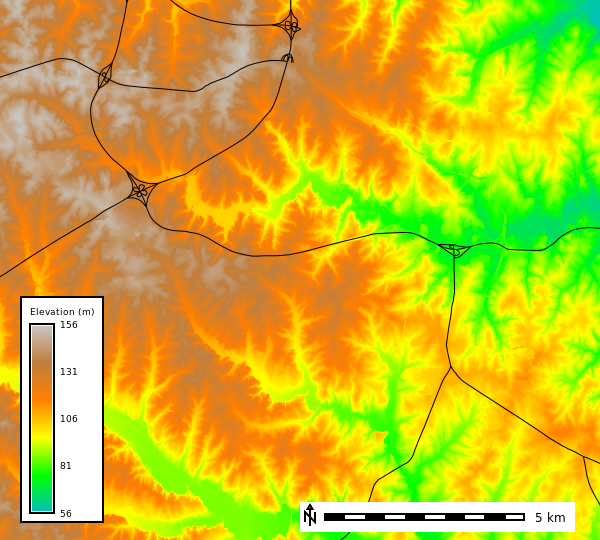

In [13]:
dem_map = gj.Map() # Create a map object
dem_map.d_rast(map="elevation") # Add the raster map to the map object
dem_map.d_vect(map="roadsmajor", color="black") # Add the vector map to the map object

# Add a raster legend
dem_map.d_legend(
    raster="elevation",
    at=(5,40,5,9),
    title="Elevation (m)",
    font="sans",
    flags="b"
) 
dem_map.d_barscale(at=(50,7), flags="n") # Add a scale bar to the map
dem_map.show() # Display the map

Let's overlay the `elevation` data over the `aspect` to see how the terrain looks with shaded relief.

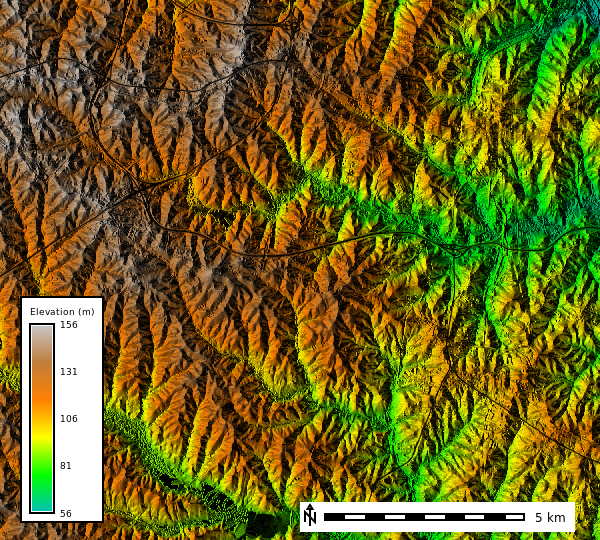

In [14]:
dem_map = gj.Map() # Create a map object
dem_map.d_shade(color="elevation", shade="aspect") # Add a shaded relief map
dem_map.d_vect(map="roadsmajor", color="black") # Add the vector map to the map object

# Add a raster legend
dem_map.d_legend(
    raster="elevation",
    at=(5,40,5,9),
    title="Elevation (m)",
    font="sans",
    flags="b"
) 
dem_map.d_barscale(at=(50,7), flags="n") # Add a scale bar to the map
dem_map.show() # Display the map

We can also change the color scheme of our map layers using the `r.colors` tool. Here we will change the color scheme of the `aspect` layer to `aspectcolr`. 

In [15]:
gs.run_command("r.colors", map="aspect", color="aspectcolr")

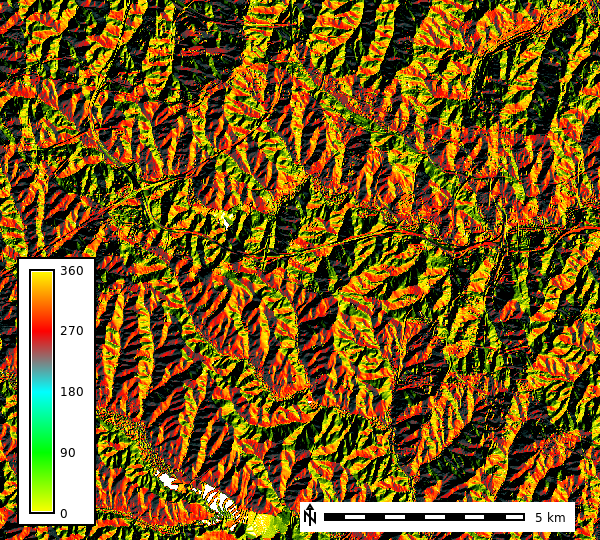

In [16]:
dem_shade_map = gj.Map() # Create a map object
dem_shade_map.d_shade(color="aspect", shade="aspect") # Add a shaded relief map
dem_shade_map.d_legend(raster="aspect", at=(5,50,5,9), flags="b") # Add a raster legend
dem_shade_map.d_barscale(at=(50,7,1,1), flags="n") # Add a scale bar to the map
dem_shade_map.show() # Display the map

#### 3D Maps

GRASS GIS can also create 3D maps using the `nviz` tool. The `nviz` tool allows you to visualize raster and vector data in 3D space. Here we will create a 3D map of the `elevation` data overlayed with the `landuse` data.

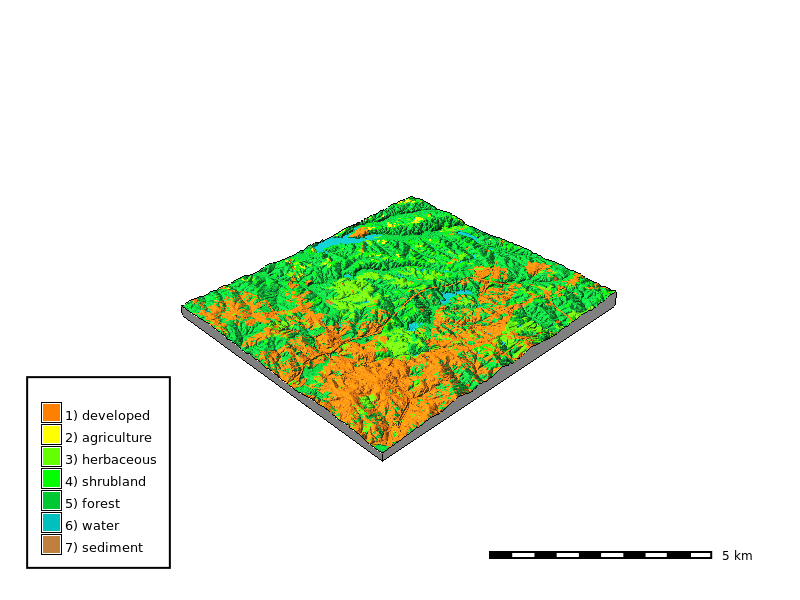

In [18]:
elevation_3dmap = gj.Map3D(use_region=False, width=800, height=600)
# Full list of options m.nviz.image
# https://grass.osgeo.org/grass-stable/manuals/m.nviz.image.html
elevation_3dmap.render(
    elevation_map="elevation",
    color_map="landuse",
    perspective=35,
    height=5000,
    resolution_fine=1,
    zexag=5,
    fringe=['ne','nw','sw','se'],
    fringe_elevation=10,
    arrow_position=[100,50],
)
elevation_3dmap.overlay.d_barscale(at=(60,10), flags="")
elevation_3dmap.overlay.d_legend(raster="landuse", at=(5,35,5,9), flags="b")
elevation_3dmap.show()

#### Web Maps

In [43]:
elevation_map = gj.InteractiveMap(width=800, height=600)
elevation_map.add_raster("aspect", opacity=0.5)
elevation_map.add_raster("elevation", opacity=0.7)
elevation_map.add_vector("roadsmajor")
display(elevation_map.show())

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

## NCSSM NDVI & Watershed Analysis

In [44]:
gj.init("./grassdata/nc_basic_spm_grass7/ncssm")

In [45]:
gs.run_command("g.region", raster="ncssm_be_1m", res=1, flags="ap")

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      252984
south:      251460
west:       615696
east:       617223
nsres:      1
ewres:      1
rows:       1524
cols:       1527
cells:      2327148


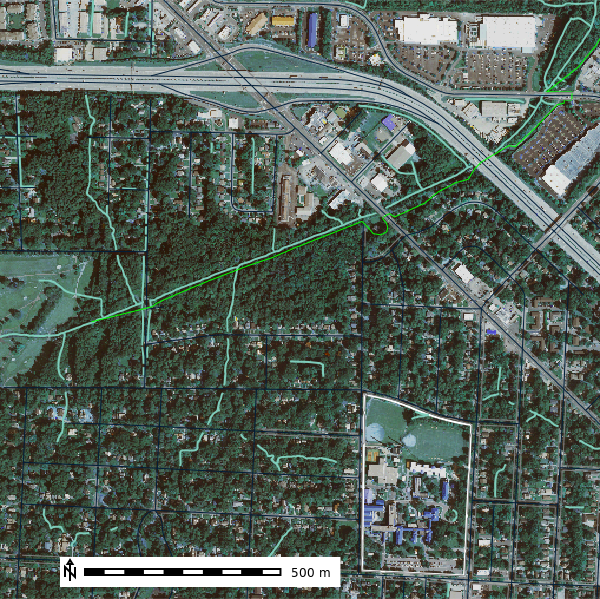

In [46]:
map = gj.Map()
map.d_rast(map="naip_2022_rgb")
map.d_vect(map="ncssm", fill_color="none", color="white", width=2)
map.d_vect(map="open_channels", color="#7fcdbb", width=2)
map.d_vect(map="roads")
map.d_vect(map="greenways", color="green")
map.d_vect(map="sidewalks", color="grey")
map.d_barscale(at=(10,7), flags="n")
map.show()

#### Slope & Aspect

In [47]:
gs.run_command(
    "r.slope.aspect",
    elevation="ncssm_be_1m",
    slope="slope",
    aspect="aspect",
    dx="dx",
    dy="dy",
    overwrite=True
)

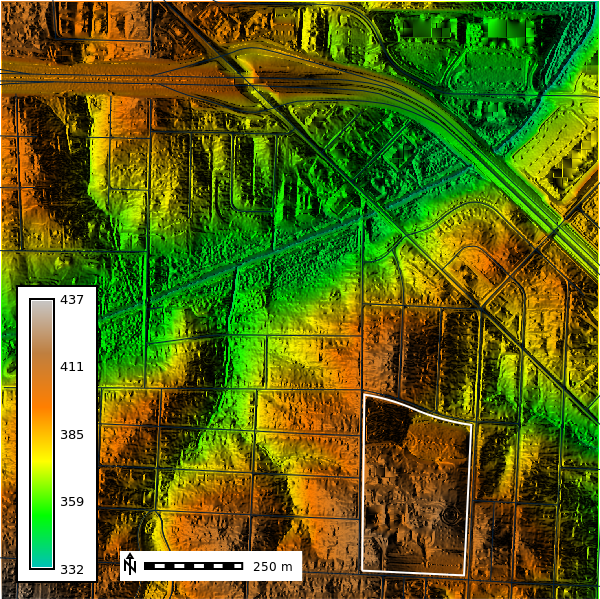

In [48]:
ncssm_map = gj.Map()
ncssm_map.d_shade(color="ncssm_be_1m", shade="aspect")
ncssm_map.d_vect(map="ncssm", fill_color="none", color="white", width=2)
ncssm_map.d_vect(map="roads")
ncssm_map.d_legend(raster="ncssm_be_1m", at=(5,50,5,9), flags="b")
ncssm_map.d_barscale(at=(20,8), flags="n", length=250)
ncssm_map.show()

### NDVI (Normalized Difference Vegetation Index) 

NDVI is a simple calculation that measure chlorophyll absorbtion in plants. It utilizes the Red and Near-Infrared (NIR) light to produce an index between -1 and 1 where 1 represents healthy vegetation and values less than or equal to 0 represent bare earth or other forms of imperious surface.

$$ NDVI = \frac{(NIR - Red)}{(NIR + Red)} $$


In [49]:
gs.run_command(
    "i.vi",
    viname="ndvi",
    red="naip2022.red",
    nir="naip2022.nir",
    output="naip2022_ndvi"
)

Let's viusalize the NDVI for the area around NCSSM.

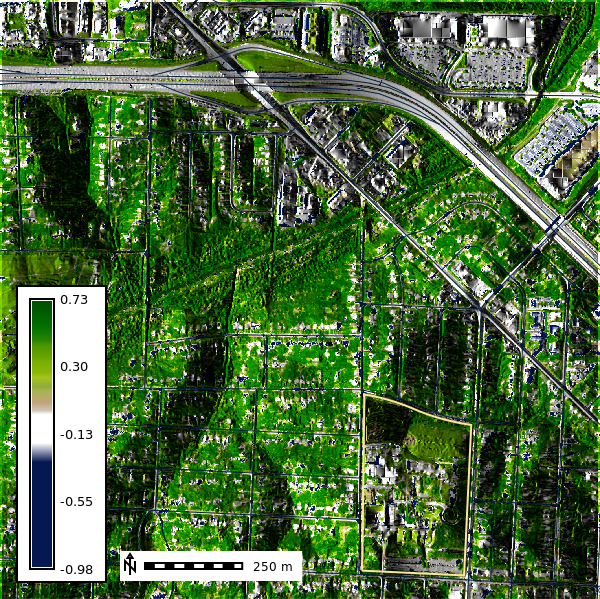

In [134]:
ndvi_map = gj.Map()
ndvi_map.d_shade(color="naip2022_ndvi", shade="aspect", brighten=30)
ndvi_map.d_vect(map="ncssm", fill_color="none", color="#FFE599", width=2)
ndvi_map.d_vect(map="roads")
ndvi_map.d_barscale(at=(20,8), flags="n", length=250)
ndvi_map.d_legend(raster="naip2022_ndvi", at=(5,50,5,9), flags="b")
ndvi_map.show()

#### 3D Map

> Does not work in Google Colab

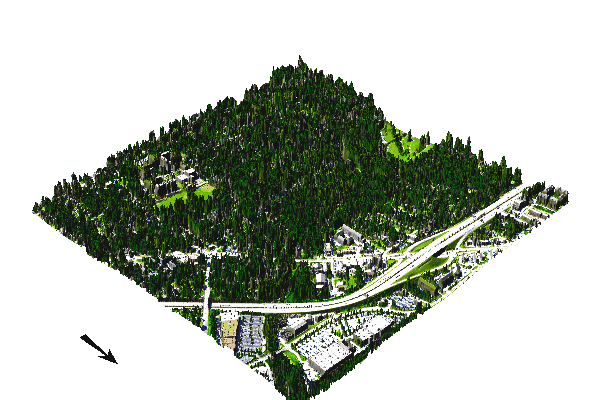

In [52]:
elevation_3dmap = gj.Map3D(use_region=False)
# Full list of options m.nviz.image
# https://grass.osgeo.org/grass83/manuals/m.nviz.image.html
elevation_3dmap.render(
    elevation_map="ncssm_1m",
    color_map="naip2022_ndvi",
    perspective=20,
    height=3000,
    resolution_fine=1,
    zexag=1,
    # fringe=['ne','nw','sw','se'],
    fringe_elevation=0,
    arrow_position=[100,50],
)
elevation_3dmap.show()

### Watershed

In [53]:
gs.run_command(
    "r.watershed", 
    elevation="ncssm_be_1m", 
    threshold=10000,
    accumulation="accum10k",
    drainage="direction10k",
    basin="basins10k", 
    stream="streams10k", 
    memory=300
)

#### Basins

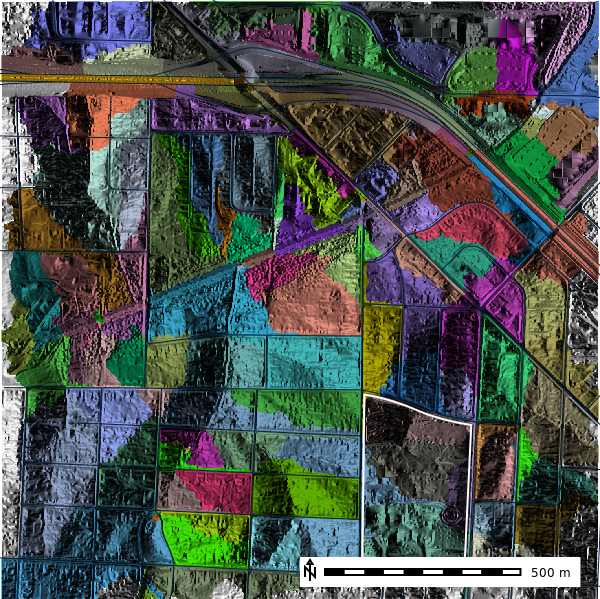

In [ ]:
basins10k_map = gj.Map()
basins10k_map.d_shade(color="basins10k", shade="aspect")
basins10k_map.d_vect(map="ncssm", fill_color="none", color="white", width=2)
basins10k_map.d_vect(map="roads")
basins10k_map.d_barscale(at=(50,7,1,1), flags="n")
basins10k_map.show()

In [102]:
gs.run_command(
    "r.stats.zonal",
    base="basins10k",
    cover="naip2022_ndvi",
    method="average",
    output="basins10k_ndvi_avg", 
    flags="c"
)


In [104]:
gs.run_command("r.to.vect", input="basins10k", output="basins10k", type="area", flags="v")

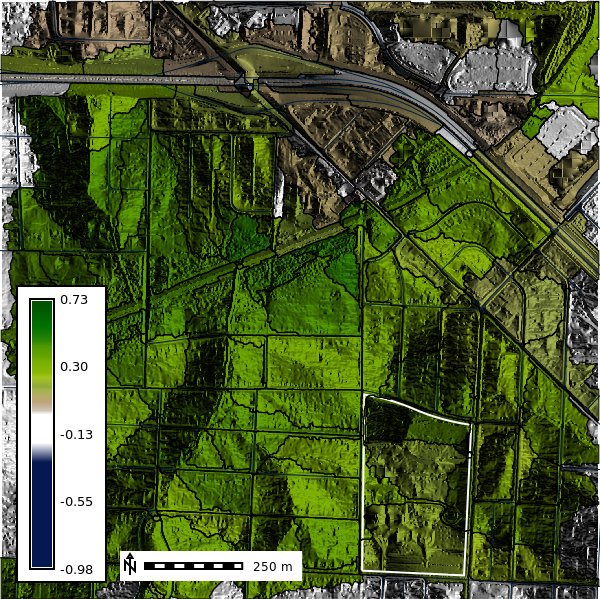

In [111]:
# Change the map color
gs.run_command("r.colors", map="basins10k_ndvi_avg", color="ndvi", flags="")

basins10k_map = gj.Map()
basins10k_map.d_shade(color="basins10k_ndvi_avg", shade="aspect")
basins10k_map.d_vect(map="ncssm", fill_color="none", color="white", width=2)
basins10k_map.d_vect(map="roads")
basins10k_map.d_vect(map="basins10k", color="black", fill_color="none", width=1.5)
basins10k_map.d_barscale(at=(20,8), flags="n", length=250)
basins10k_map.d_legend(raster="naip2022_ndvi", at=(5,50,5,9), flags="b")
basins10k_map.show()

#### Streams

In [33]:
gs.run_command("r.thin", input="streams10k", output="streams10k_thin")
gs.run_command("r.to.vect", flags="s", input="streams10k_thin", output="streams", type="line")

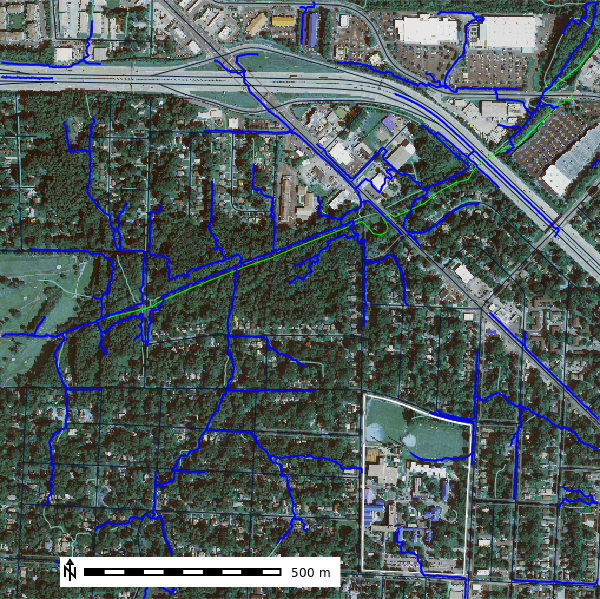

In [34]:
map = gj.Map()
map.d_rast(map="naip_2022_rgb")
map.d_vect(map="ncssm", fill_color="none", color="white", width=2)
map.d_vect(map="open_channels", color="#7fcdbb", width=1)

map.d_vect(map="roads")
map.d_vect(map="greenways", color="green")
map.d_vect(map="sidewalks", color="grey")
map.d_vect(map="streams", color="blue", width=2)
map.d_barscale(at=(10,7), flags="n")
map.show()

### Estimate Flood Innundation

Let's estimate the flood inundation for the area around NCSSM using the Height Above Nearest Drainage methodology ([A.D. Nobre, 2011](https://doi.org/10.1016/j.jhydrol.2011.03.051)). First need to install two GRASS addons `r.stream.distance` and `r.lake.series` to calculate the distance to the nearest stream and create a flood inundation map.

In [ ]:
gs.run_command("g.extension", extension="r.stream.distance")
gs.run_command("g.extension", extension="r.lake.series")

Your branch is up to date with 'origin/grass8'.


Here we will simulate the flood inundation extent starting from $0 m$ to $5 m$ above the nearest stream.

In [112]:
gs.run_command("r.stream.distance", stream_rast="streams10k", direction="direction10k", elevation="ncssm_be_1m", method="downstream", difference="above_stream")
gs.run_command("r.lake.series", elevation="above_stream", start_water_level=0, end_water_level=5, water_level_step=0.5, output="flooding", seed="streams10k")

We can visulize the flood event from using the time series of the flood stages using `gj.TimeSeries`.

In [120]:
flood_map = gj.TimeSeriesMap()
flood_map.d_rast(map="naip_2022_rgb")
flood_map.d_vect(map="ncssm", fill_color="none", color="white", width=2)
flood_map.d_vect(map="roads")
flood_map.add_raster_series("flooding")
flood_map.d_legend()
flood_map.save("output/flooding.gif")
flood_map.show()

![Est. Flood Inundation](output/flooding.gif)

We can further analysze our results by looking at the `r.univar` statistics of the flood inundation layers.

In [126]:
import io

flood_output = gs.read_command("t.rast.univar", input="flooding", separator="comma")
print(flood_output)
df_flood = pd.read_csv(io.StringIO(flood_output), sep=",")
df_flood.head()

id,semantic_label,start,end,mean,min,max,mean_of_abs,stddev,variance,coeff_var,sum,null_cells,cells,non_null_cells
flooding_0.0@ncssm,,1,None,0.293114999222854,3.0517578125e-05,6.39630126953125,0.293114999222854,0.530534688513158,0.281467055715753,180.998819548567,3598.57284545898,2314871,12277,12277
flooding_0.5@ncssm,,31,None,0.3905529433589,3.0517578125e-05,6.89630126953125,0.3905529433589,0.403808791069356,0.163061539744895,103.3941231108,59409.3515319824,2175032,152116,152116
flooding_1.0@ncssm,,61,None,0.655780018643008,3.0517578125e-05,7.39630126953125,0.655780018643008,0.451270096181418,0.203644699707586,68.8142491921639,160044.425109863,2083096,244052,244052
flooding_1.5@ncssm,,91,None,0.944751617646385,3.0517578125e-05,7.89630126953125,0.944751617646385,0.552086194782351,0.304799166469256,58.4371790923986,302084.329742432,2007398,319750,319750
flooding_2.0@ncssm,,121,None,1.24039884684191,3.0517578125e-05,8.39630126953125,1.24039884684191,0.676488838166942,0.457637148164459,5

id  semantic_label  start  end      mean       min  \
0  flooding_0.0@ncssm             NaN      1  NaN  0.293115  0.000031   
1  flooding_0.5@ncssm             NaN     31  NaN  0.390553  0.000031   
2  flooding_1.0@ncssm             NaN     61  NaN  0.655780  0.000031   
3  flooding_1.5@ncssm             NaN     91  NaN  0.944752  0.000031   
4  flooding_2.0@ncssm             NaN    121  NaN  1.240399  0.000031   

        max  mean_of_abs    stddev  variance   coeff_var            sum  \
0  6.396301     0.293115  0.530535  0.281467  180.998820    3598.572845   
1  6.896301     0.390553  0.403809  0.163062  103.394123   59409.351532   
2  7.396301     0.655780  0.451270  0.203645   68.814249  160044.425110   
3  7.896301     0.944752  0.552086  0.304799   58.437179  302084.329742   
4  8.396301     1.240399  0.676489  0.457637   54.538009  480802.160614   

   null_cells   cells  non_null_cells  
0     2314871   12277           12277  
1     2175032  152116          152116  
2     2083096  244052          244052  
3     2007398  319750          319750  
4     1939529  387619          387619

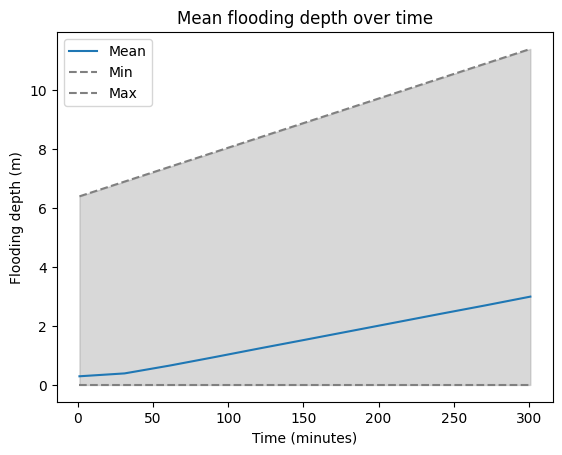

In [129]:
ax = df_flood.plot(x="start", y="mean", title="Mean flooding depth over time", label="Mean")
df_flood.plot(x="start", y="min", ax=ax, style='--', label="Min", color='gray')
df_flood.plot(x="start", y="max", ax=ax, style='--', label="Max", color='gray')
ax.fill_between(df_flood["start"], df_flood["min"], df_flood["max"], color='gray', alpha=0.3)
plt.ylabel("Flooding depth (m)")
plt.xlabel("Time (minutes)")
plt.show()

#### Interactive Estimated Flood Inundation Map

In [133]:
flood_map = gj.InteractiveMap(height=800,width=800)
flood_map.add_raster("naip_2022_rgb")
flood_map.add_raster("flooding_5.0")
flood_map.add_vector("streams@ncssm")
flood_map.add_layer_control()
display(flood_map.show())

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

#### Export Map as HTML

In [ ]:
flood_map.save(filename="./output/index.html")

## Create a new Project (Location and Mapset)

Create a new subproject (i.e. Mapset)

This example uses a temprary directory to create a new project call `myfirstproject` with the `EPSG:3358` CRS.

```python
from pathlib import Path
import tempfile

tempdir = tempfile.TemporaryDirectory()

gs.create_project(path=tempdir, name="myfirstproject", epsg="3358")
```

Start a new GRASS GIS session in the new subproject

```python
gj.init(Path(tempdir.name), "myfirstproject")
```

### Local Data Resources

#### Where can I get my own geospatial data?

**North Carolina Online Data Portals**

* [NC OneMap](https://www.nconemap.gov/)
* [Durham OpenData Portal](https://live-durhamnc.opendata.arcgis.com/)

In [ ]:
# Point Data
hospitals = "https://webgis2.durhamnc.gov/server/rest/services/PublicServices/Community/MapServer/0/query?outFields=*&where=1%3D1f=geojson"
schools = "https://webgis2.durhamnc.gov/server/rest/services/PublicServices/Education/MapServer/0/query?outFields=*&where=1%3D1&f=geojson"

# Line Data
roads = "https://webgis2.durhamnc.gov/server/rest/services/PublicServices/Transportation/MapServer/6/query?outFields=*&where=1%3D1f=geojson"
greenways = "https://webgis2.durhamnc.gov/server/rest/services/ProjectServices/Trans_ExistingFutureBikePedFacilities/MapServer/1/query?outFields=*&where=1%3D1f=geojson"
sidewalks = "https://webgis2.durhamnc.gov/server/rest/services/PublicServices/Community/MapServer/5/query?outFields=*&where=1%3D1f=geojson"

# Polygon Datahttps://earth.nullschool.net
zipcodes = "https://webgis2.durhamnc.gov/server/rest/services/PublicServices/Administrative/MapServer/0/query?outFields=*&where=1%3D1f=geojson"
county_boundary = "https://webgis2.durhamnc.gov/server/rest/services/PublicServices/Administrative/MapServer/2/query?outFields=*&where=1%3D1f=geojson"
durham_city_boundary = "https://webgis2.durhamnc.gov/server/rest/services/PublicServices/Administrative/MapServer/1/query?outFields=*&where=1%3D1f=geojson"
school_districts = "https://webgis2.durhamnc.gov/server/rest/services/PublicServices/Education/MapServer/1/query?outFields=*&where=1%3D1f=geojson"


In [98]:
!v.import --help

Imports vector data into a GRASS vector map using OGR library and reprojects on the fly.

Usage:
 v.import [-flo] input=string [layer=string[,string,...]] [output=name]
   [extent=string] [encoding=string] [snap=value] [epsg=value]
   [datum_trans=value] [--overwrite] [--help] [--verbose] [--quiet]
   [--ui]

Flags:
  -f   List supported OGR formats and exit
  -l   List available OGR layers in data source and exit
  -o   Override projection check (use current location's projection)

Parameters:
        input   Name of OGR datasource to be imported
        layer   OGR layer name. If not given, all available layers are imported
       output   Name for output vector map (default: input)
       extent   Output vector map extent
                options: input,region
                default: input
     encoding   Encoding value for attribute data
         snap   Snapping threshold for boundaries (map units)
                default: -1
         epsg   EPSG projection code
                opt

In [97]:
!r.import --help

Imports raster data into a GRASS raster map using GDAL library and reprojects on the fly.

Usage:
 r.import [-enlo] input=name [band=value[,value,...]]
   [memory=memory in MB] [output=name] [resample=string] [extent=string]
   [resolution=string] [resolution_value=value] [title=phrase]
   [--overwrite] [--help] [--verbose] [--quiet] [--ui]

Flags:
  -e   Estimate resolution only
  -n   Do not perform region cropping optimization
  -l   Force Lat/Lon maps to fit into geographic coordinates (90N,S; 180E,W)
  -o   Override projection check (use current location's projection)

Parameters:
             input   Name of GDAL dataset to be imported
              band   Input band(s) to select (default is all bands)
            memory   Maximum memory to be used (in MB)
                     default: 300
            output   Name for output raster map
          resample   Resampling method to use for reprojection
                     options: nearest,bilinear,bicubic,lanczos,bilinear_f,
       

## Install Add-Ons

[Add-On Index](https://grass.osgeo.org/grass82/manuals/addons/index.html)


In [99]:
!g.extension --help

Maintains GRASS Addons extensions in local GRASS installation.

Usage:
 g.extension [-lcgasdifto] extension=name operation=string [url=url]
   [prefix=path] [proxy=proxy[,proxy,...]] [branch=branch] [--help]
   [--verbose] [--quiet] [--ui]

Flags:
  -l   List available extensions in the official GRASS GIS Addons repository
  -c   List available extensions in the official GRASS GIS Addons repository including module description
  -g   List available extensions in the official GRASS GIS Addons repository (shell script style)
  -a   List locally installed extensions
  -s   Install system-wide (may need system administrator rights)
  -d   Download source code and exit
  -i   Do not install new extension, just compile it
  -f   Force removal when uninstalling extension (operation=remove)
  -t   Operate on toolboxes instead of single modules (experimental)
  -o   url refers to a fork of the official extension repository

Parameters:
  extension   Name of extension to install or remove
  oper